## Document Clustering - Hierarchial Clustering

### Creating a sample list of documents

In [ ]:
documents = [
"Sports offer a fun and engaging way to stay active and improve physical fitness.",
"Maintaining good health is essential for overall well-being and quality of life.",
"Healthy habits such as balanced nutrition and regular exercise can support a strong immune system and good health",
"Technology drives innovation and shapes our daily lives, transforming how we communicate, work, and access information.",
"Participating in sports can build teamwork skills and foster camaraderie among players and improve fitness",
"Advancements in technology, such as artificial intelligence and smartphones, continue to revolutionize industries and enhance convenience for people worldwide.",
"Climate change is a pressing global issue that threatens ecosystems and biodiversity.",
"Taking action to reduce greenhouse gas emissions and protect natural resources is crucial for mitigating the impacts of climate change."
]

### Applying Pre-Processing Steps

In [ ]:
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

### Retriving a set of Stop Words in english

In [ ]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### Lemmatization

In [ ]:
nltk.download('punkt')  # for tokenization
nltk.download('wordnet')  # for lemmatization

lemmatizer = WordNetLemmatizer()  ## reduce to base or canonical form

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from nltk.tokenize import word_tokenize
def preprocess_text(text):
    tokens = word_tokenize(text.lower())   ## tokenize and lowercase

    # remove stop_words and punctuations
    tokens = [token for token in tokens if token not in stopwords.words('english') and token not in string.punctuation]

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(tokens)
preprocessed_documents = [preprocess_text(doc) for doc in documents]

In [ ]:
preprocessed_documents

['sport offer fun engaging way stay active improve physical fitness',
 'maintaining good health essential overall well-being quality life',
 'healthy habit balanced nutrition regular exercise support strong immune system good health',
 'technology drive innovation shape daily life transforming communicate work access information',
 'participating sport build teamwork skill foster camaraderie among player improve fitness',
 'advancement technology artificial intelligence smartphones continue revolutionize industry enhance convenience people worldwide',
 'climate change pressing global issue threatens ecosystem biodiversity',
 'taking action reduce greenhouse gas emission protect natural resource crucial mitigating impact climate change']

### TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_documents)

In [ ]:
tfidf_matrix

<8x78 sparse matrix of type '<class 'numpy.float64'>'
	with 87 stored elements in Compressed Sparse Row format>

### Cosine - Similarity (-1,0,1)

In [ ]:
# Calculate pairwise cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(tfidf_matrix)

In [ ]:
cosine_similarities

array([[1.        , 0.        , 0.        , 0.        , 0.21962701,
        0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.14609072, 0.07647504, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.14609072, 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.07647504, 0.        , 1.        , 0.        ,
        0.06365259, 0.        , 0.        ],
       [0.21962701, 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.06365259, 0.        ,
        1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.14099846],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14099846, 1.        ]])

## Hierarchial Clustering (Agglomerative)

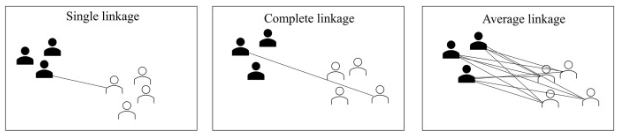

## Single Linkage

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg_single = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='single')
agg_single.fit(cosine_similarities)

In [ ]:
# Visualize dendrogram
def plot_dendrogram(model, **kwargs):
    #An array to store the count of  data points in each merged cluster
    #It is initialized with zeros.
    counts = np.zeros(model.children_.shape[0])
    #Total number of data points in the dataset
    n_samples = len(model.labels_)
    #hierarchical clustering tree
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,counts]).astype(float)
    #print(linkage_matrix)
    dendrogram(linkage_matrix, **kwargs)

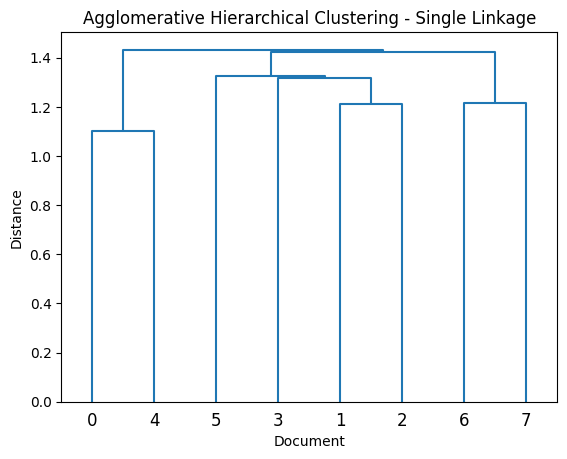

In [ ]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import numpy as np
plt.title('Agglomerative Hierarchical Clustering - Single Linkage')
plot_dendrogram(agg_single)
plt.xlabel("Document")
plt.ylabel("Distance")
plt.show()

## Complete Linkage

In [ ]:
agg_complete = linkage(cosine_similarities, method='complete')
print("Agglomerative hierarchical clustering with complete linkage:\n", agg_complete)

Agglomerative hierarchical clustering with complete linkage:
 [[ 0.          4.          1.10361407  2.        ]
 [ 1.          2.          1.21002915  2.        ]
 [ 6.          7.          1.21481162  2.        ]
 [ 3.          5.          1.32640166  2.        ]
 [ 9.         11.          1.42316343  4.        ]
 [10.         12.          1.43075906  6.        ]
 [ 8.         13.          1.44063422  8.        ]]


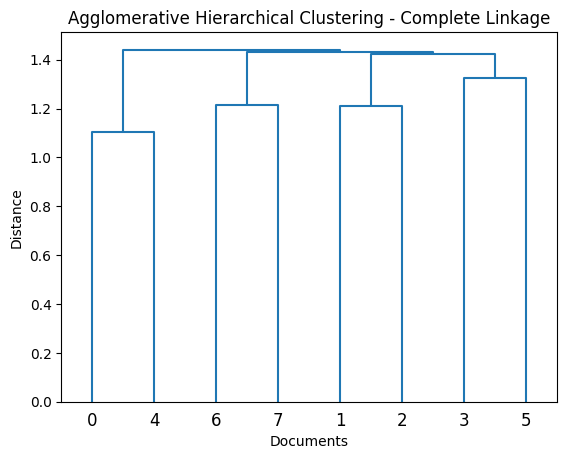

In [ ]:
# Visualize dendrogram for agglomerative hierarchical clustering with complete linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
dendrogram(agg_complete, leaf_font_size=12, labels=np.arange(len(documents)))
plt.title('Agglomerative Hierarchical Clustering - Complete Linkage')
plt.xlabel('Documents')
plt.ylabel('Distance')
plt.show()

## Average Linkage

In [ ]:
agg_avg = linkage(cosine_similarities, method='average')
print("Agglomerative hierarchical clustering with avergae linkage:\n", agg_avg)

Agglomerative hierarchical clustering with avergae linkage:
 [[ 0.          4.          1.10361407  2.        ]
 [ 1.          2.          1.21002915  2.        ]
 [ 6.          7.          1.21481162  2.        ]
 [ 3.          5.          1.32640166  2.        ]
 [ 9.         11.          1.39451594  4.        ]
 [10.         12.          1.42670657  6.        ]
 [ 8.         13.          1.43710468  8.        ]]


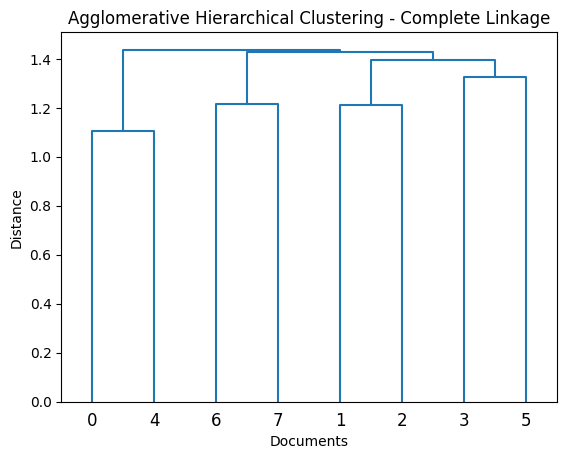

In [ ]:
# Visualize dendrogram for agglomerative hierarchical clustering with complete linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
dendrogram(agg_avg, leaf_font_size=12, labels=np.arange(len(documents)))
plt.title('Agglomerative Hierarchical Clustering - Complete Linkage')
plt.xlabel('Documents')
plt.ylabel('Distance')
plt.show()

## Ward Linkage

In [ ]:
agg_ward = linkage(cosine_similarities, method='ward')
print("Agglomerative hierarchical clustering with ward linkage:\n", agg_ward)

Agglomerative hierarchical clustering with ward linkage:
 [[ 0.          4.          1.10361407  2.        ]
 [ 1.          2.          1.21002915  2.        ]
 [ 6.          7.          1.21481162  2.        ]
 [ 3.          5.          1.32640166  2.        ]
 [ 9.         11.          1.51054262  4.        ]
 [10.         12.          1.61526359  6.        ]
 [ 8.         13.          1.69848007  8.        ]]


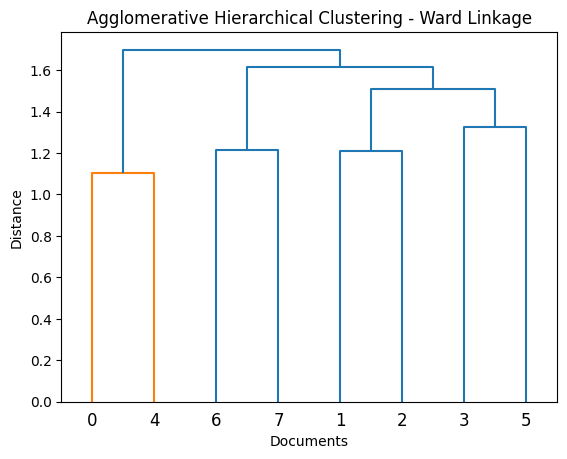

In [ ]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
dendrogram(agg_ward, leaf_font_size=12, labels=np.arange(len(documents)))
plt.title('Agglomerative Hierarchical Clustering - Ward Linkage')
plt.xlabel('Documents')
plt.ylabel('Distance')
plt.show()

## Hierarchial Clustering (Divisive)

In [ ]:
# Divisive Hierarchical Clustering (using AgglomerativeClustering with large number of clusters)
from sklearn.cluster import AgglomerativeClustering
n_samples, _ = tfidf_matrix.shape
model = AgglomerativeClustering(n_clusters=n_samples, affinity='euclidean', linkage='single')
clusters = model.fit_predict(tfidf_matrix.toarray())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
tfidf_matrix.shape

(8, 78)

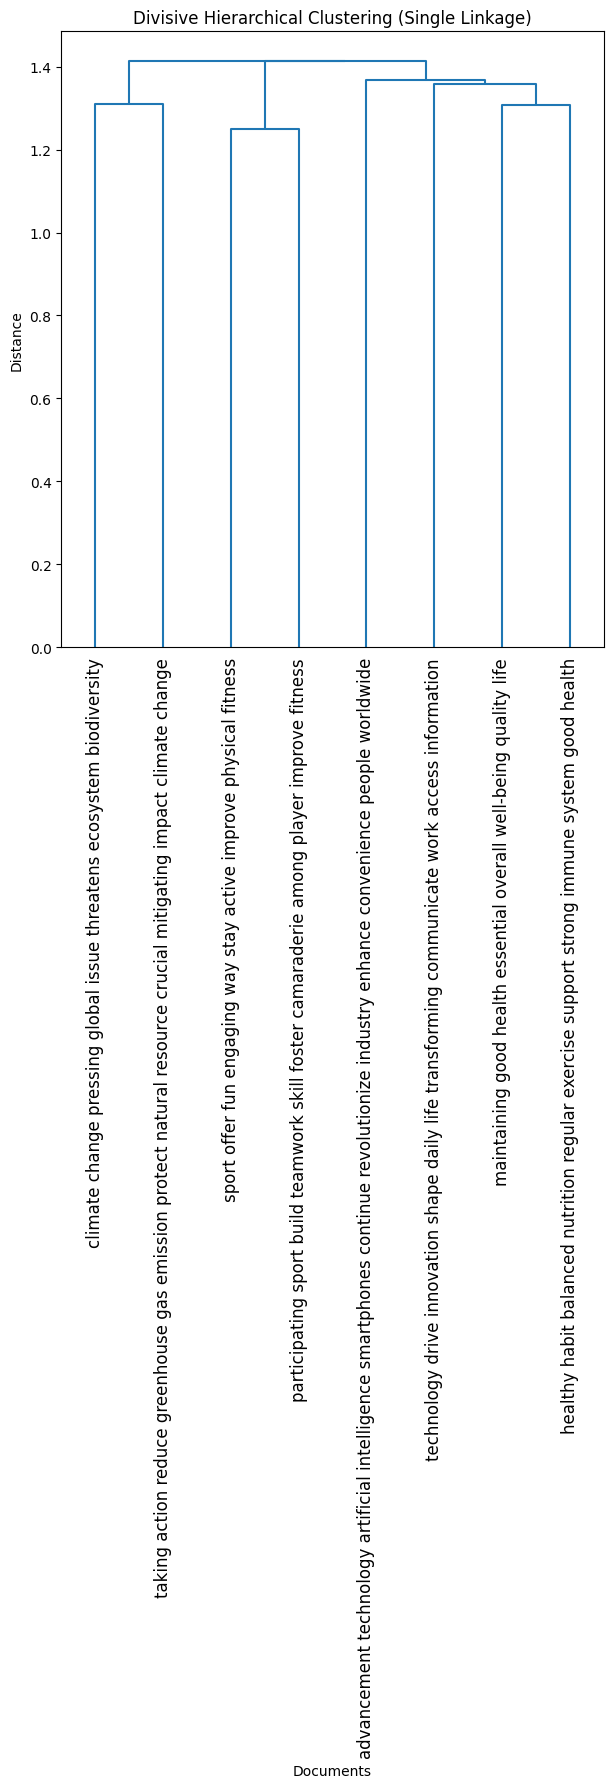

In [ ]:
# Plot dendrogram
plt.figure(figsize=(7, 8))
dendrogram(linkage(tfidf_matrix.toarray(), method='single'), labels=preprocessed_documents, leaf_rotation=90)
plt.title('Divisive Hierarchical Clustering (Single Linkage)')
plt.xlabel('Documents')
plt.ylabel('Distance')
plt.show()